## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Generate synthetic data 
### (true positions and noisy observations)

In [2]:
n_steps = 50
true_positions = np.linspace(0, 100, n_steps)
noise = np.random.normal(0, 5, n_steps) # mean=0, std=5
observations = true_positions + noise

In [3]:
observations

array([-2.17578085,  5.66980624, 19.36428174,  3.73930524,  3.40009644,
        2.58364436, 13.10076629, 10.08694746,  7.44491094,  9.22001495,
       23.00688222, 16.36906312, 20.9665452 , 26.08434809, 24.73192139,
       23.3291765 , 42.15549275, 31.87723229, 33.44572606, 38.53706325,
       33.90076595, 43.33584139, 42.18525539, 51.80622932, 44.15328255,
       50.65714014, 59.22656544, 57.42731788, 59.60086563, 57.67501508,
       64.35686906, 57.72317716, 55.62668798, 67.63046953, 69.04740342,
       76.3635223 , 65.66898171, 83.14434278, 83.87380774, 79.92291586,
       79.18963638, 81.18611156, 91.77727189, 88.86502379, 95.26535848,
       92.87519216, 85.06869982, 97.4816145 , 91.93244038, 98.32315129])

In [4]:
true_positions

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [5]:
noise

array([-2.17578085,  3.62898992, 15.28264908, -2.38314374, -4.76316887,
       -7.62043727,  0.85586833, -4.19876683, -8.88161967, -9.14733199,
        2.59871895, -6.07991647, -3.52325072, -0.44626415, -3.83950718,
       -7.2830684 ,  9.50243152, -2.81664526, -3.28896781, -0.23844696,
       -6.91556058,  0.47869853, -2.71270379,  4.86745381, -4.82630929,
       -0.36326802,  6.16534095,  2.32527706,  2.45800849, -1.50865839,
        3.13237927, -5.54212896, -9.67943447,  0.28353075, -0.34035168,
        4.93495087, -7.80040605,  7.6341387 ,  6.32278733,  0.33107912,
       -2.44301669, -2.48735782,  6.06298617,  1.10992175,  5.46944011,
        1.03845747, -8.8088512 ,  1.56324715, -6.0267433 , -1.67684871])

## Step 2: Initialize Bayesian filter variables

In [6]:
estimated_positions = []
belief = 50
belief_variance = 10
measurement_variance = 5
motion_variance = 2 

## Step 3: Apply Bayesian Filtering

In [7]:
for t in range(n_steps):
    # prediction
    belief = belief
    belief_variance += motion_variance

    # Update
    # K = p(prior)/p(prior)+R
    kalman_gain = belief_variance / (belief_variance + measurement_variance)
    belief = belief + kalman_gain * (observations[t] - belief)
    belief_variance = (1 - kalman_gain) * belief_variance

    estimated_positions.append(belief)

In [10]:
len(estimated_positions)

50

## Step 4: Plot results

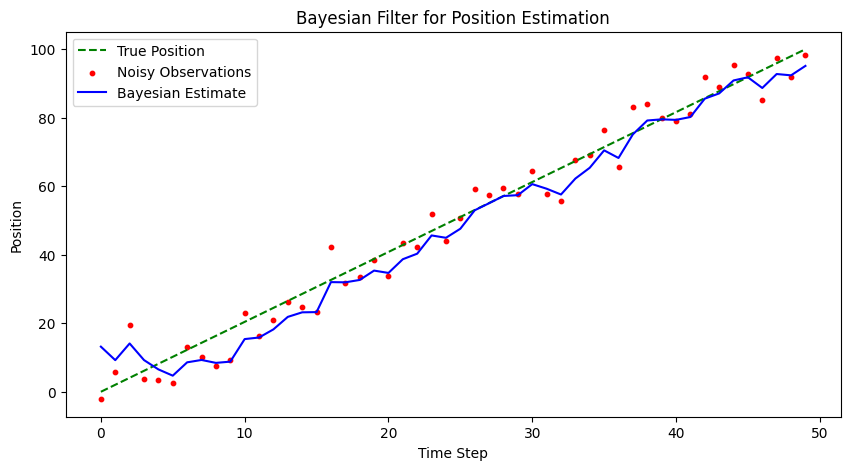

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label='True Position', linestyle='dashed', color='g')
plt.scatter(range(n_steps), observations, label='Noisy Observations', color='r', s=10)
plt.plot(estimated_positions, label='Bayesian Estimate', color='b')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.title('Bayesian Filter for Position Estimation')
plt.show()